In [11]:
# invisible
lines = open("img_resolution.txt").readlines()
resolution = lines[0].strip()
if resolution != "default":
    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = int(resolution)

<br>



## Matplotlib Tutorial: Achsen und Skalenteilung

<br>

### Achsenverschiebungen und Achsenbezeichnungen





<img width="40%" class="imgright" src="../images/spines.webp" srcset="../images/spines_300w.webp 300w" alt="spines" />



In Matplotlib werden die Achsen als "spines" bezeichnet. Das englische Wort "spine" bezeichnet normalerweise das Rückgrat oder die Wirbelsäule des menschlichen Skeletts. Es kann aber auch für die Stacheln eines Kaktus stehen. Im Bild haben wir ein Bild mit Kakteenstacheln soweit verändert, dass sie Ähnlichkeit mit einem Brustkorb haben.  "spines" bezeichnen in Matplotlib die Linien, welche die Achsen-Markierungen verbinden unter Berücksichtigung des Datenbereichs. Im Deutschen sprechen wir von Achsen. 

Wir demonstrieren im Folgenden, wie wir die Achsen ("spines") an beliebige Stellen verschieben können.

Bevor wir damit beginnen können, führen wir die gca-Funktion ein. Diese Funktion liefert eine Referenz auf die aktuelle Plotinstanz bzw. Figur zurück. 


Wir können zum Beispiel ```plt.gca(projection='polar')``` aufrufen, um die aktuellen Polar-Achsen zu erhalten.

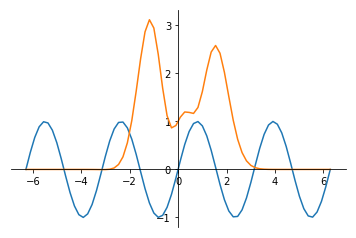

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X  = np.linspace(-2 * np.pi, 2 * np.pi, 70, endpoint=True)
F1 = np.sin(2* X)
F2 = (2*X**5 + 4*X**4 - 4.8*X**3 + 1.2*X**2 + X + 1)*np.exp(-X**2)

# aktuellen Plot zuweisen:
ax = plt.gca()

# Obere und rechte Achse unsichtbar werden lassen:
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# Untere Achse auf die y=0 Position bewegen:
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

# Linke Achse auf die Position x == 0 bewegen:
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.plot(X, F1)
plt.plot(X, F2)

plt.show()

Matplotlib hat bis jetzt -- in allen vorangegangenen Beispielen -- automatisch den Abstand der Punkte auf der Achse ermittelt. In unserem vorigen Beispiel haben wir gesehen dass die X-Achse mit ```-8, -6. -4, -2, 0, 2, 4, 6, 8``` nummeriert war, während die Y-Achse mit ```-2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0``` beschriftet ist.


xticks ist eine Methode, die für das Abfragen und Verändern von Tick-Positionen und Beschriftungen benutzt werden kann. Das Gleiche gilt für die Methode yticks.

[0.  0.2 0.4 0.6 0.8 1. ] <a list of 6 Text xticklabel objects>
[0.  0.2 0.4 0.6 0.8 1. ] <a list of 6 Text yticklabel objects>


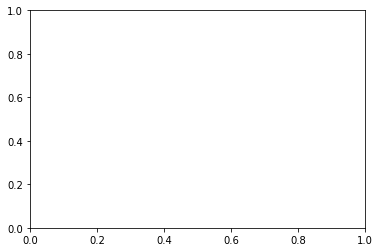

In [13]:
ax = plt.gca()

locs, labels = plt.xticks()
print(locs, labels)

locs, labels = plt.yticks()
print(locs, labels)

Wie bereits erwähnt, kann xticks ebenso dazu verwendet werden, um die Position der Ticks auf der X-Achse zu verändern:

[0 1 2 3 4 5 6 7 8 9] <a list of 10 Text xticklabel objects>


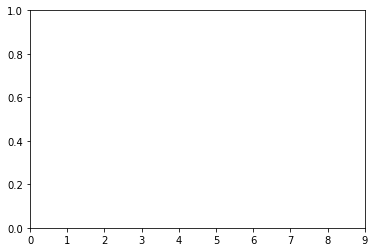

In [14]:
plt.xticks( np.arange(10) )

locs, labels = plt.xticks()
print(locs, labels)

Jetzt verändern wir sowohl die Position als auch die Beschriftung der Ticks auf der X-Achse:

([<matplotlib.axis.XTick at 0x7f179fbfc4e0>,
 <a list of 4 Text xticklabel objects>)

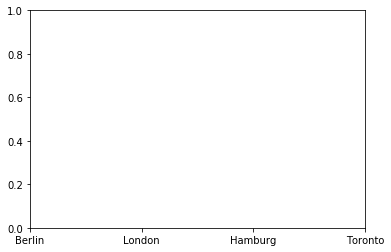

In [15]:
plt.xticks( np.arange(4), 
           ('Berlin', 'London', 'Hamburg', 'Toronto') )


Gehen wir nochmal zurück zum vorigen Beispiel der Trigonometrischen Funktionen. Die meisten werden eine Beschriftung der X-Achse in Teilen bzw. Vielfachen von pi bevorzugen: 

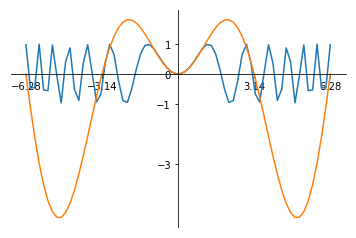

In [16]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2 * np.pi, 2 * np.pi, 70, endpoint=True)
X = np.linspace(-2 * np.pi, 2 * np.pi, 70, endpoint=True)
F1 = np.sin(X**2)
F2 = X * np.sin(X)

# aktuelle Achsen werden zurückgeliefert,
# falls notwendig, werden sie erzeugt:
ax = plt.gca()

# der obere rechte Spine wird unsichtbar gemacht:
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# der untere Spine wird in Position y=0  gebracht:
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))

# der linke Spine wird nach rechts zu x == 0 bewegt:
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xticks( [-6.28, -3.14, 3.14, 6.28])
plt.yticks([-3, -1, 0, +1, 3])
plt.plot(X, F1)
plt.plot(X, F2)

plt.show()

<br>

### Verändern der Achsenbeschriftungen



Wir möchten nun die Beschriftungen der X-Achse umbenennen und durch eigene Markierungen ersetzen. Wir benutzen dafür ebenfalls die Methode ```xticks``` wie auch schon im vorigen Beispiel. Diesmal jedoch, rufen wir ```xticks``` mit zwei Parametern auf: Der erste ist die gleiche Liste, die wir auch schon vorher benutzt haben, d.h. Positionen auf der X-Achse, an denen die Ticks gesetzt werden sollen. Der zweite Parameter ist eine Liste mit gleicher Anzahl von Elementen mit den entsprechenden LaTeX-Tick-Markierungen, d.h. der Text, der anstelle der Werte stehen soll. Die LaTeX-Schreibweise muss ein raw-String sein, um den Escape-Mechanismus von Python abzustellen, da in LaTeX das Backslash häufig genutzt wird.

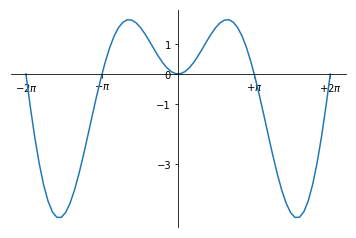

In [17]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2 * np.pi, 2 * np.pi, 70, endpoint=True)

F1 = X * np.sin(X)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Labelung der X-Achse:
plt.xticks( [-6.28, -3.14, 3.14, 6.28],
        [r'$-2\pi$', r'$-\pi$', r'$+\pi$', r'$+2\pi$'])
plt.yticks([-3, -1, 0, +1, 3])


plt.plot(X, F1)

plt.show()

<br>

### Justierung der Tick-Beschriftungen


Wir wollen die Lesbarkeit der Tick-Beschriftungen erhöhen. Dazu vergrößern wir die Schrift und zeichnen diese auf einen halbtransparenten Hintergrund.

In [18]:
print(ax.get_xticklabels())

<a list of 4 Text xticklabel objects>


In [19]:
for xtick in ax.get_xticklabels():
    print(xtick)

Text(-6.28, 0, '$-2\\pi$')
Text(-3.14, 0, '$-\\pi$')
Text(3.14, 0, '$+\\pi$')
Text(6.28, 0, '$+2\\pi$')


Jetzt vergrößern wir die Schrift und stellen die Transparenz ein:

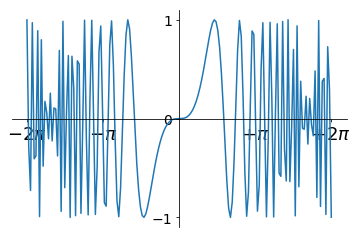

In [20]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-2 * np.pi, 2 * np.pi, 170, endpoint=True)
F1 = np.sin(X**3 / 2)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.xticks( [-6.28, -3.14, 3.14, 6.28],
        [r'$-2\pi$', r'$-\pi$', r'$+\pi$', r'$+2\pi$'])
plt.yticks([-3, -1, 0, +1, 3])


for xtick in ax.get_xticklabels():
    xtick.set_fontsize(18)
    xtick.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.7 ))

for ytick in ax.get_yticklabels():
    ytick.set_fontsize(14)
    ytick.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.7 ))
    
plt.plot(X, F1, label="$sin(x)$")

